In [15]:
import random, os, json, copy, pickle, base64
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_id_map_0904 = pickle.load(open("image_id_map_0904.pkl", "rb"))
print(len(image_id_map_0904))

389750


In [6]:
### create map new-->old image_ids
new2old = dict([(v, k) for k, v in image_id_map_0904.items()])
print(len(new2old))

389750


In [5]:
### Load img files' lineidx
img_lineidx = {}

# positive images for img-based queries
with open("/data/yingshac/MMMHQA/base64/gold_img.lineidx", "r") as fp:
    lineidx = [int(i.strip()) for i in fp.readlines()]
    print(len(lineidx))
    img_lineidx[0] = lineidx
# negative images for img-based queries
with open("/data/yingshac/MMMHQA/base64/neg_img.lineidx", "r") as fp:
    lineidx = [int(i.strip()) for i in fp.readlines()]
    print(len(lineidx))
    img_lineidx[1] = lineidx
# negative images for txt-based queries
with open("/data/yingshac/MMMHQA/base64/x_neg_img.lineidx", "r") as fp:
    lineidx = [int(i.strip()) for i in fp.readlines()]
    print(len(lineidx))
    img_lineidx[2] = lineidx

### img tsv files; paths
img_tsv = {0: "/data/yingshac/MMMHQA/base64/gold_img.tsv",
          1: "/data/yingshac/MMMHQA/base64/neg_img.tsv", 
          2: "/data/yingshac/MMMHQA/base64/x_neg_img.tsv"}

22265
340194
240700


In [39]:
with open("/data/yingshac/MMMHQA/base64_0904/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))

389750


20034139 {"image_id": "20034139"}
30389749 30389749


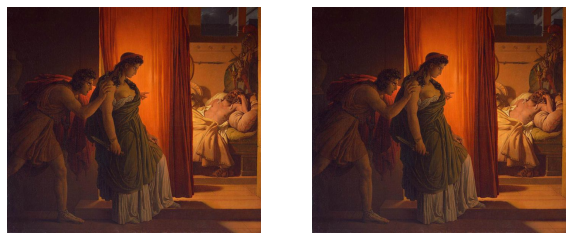

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
new_id = 30389749
old_id = new2old[new_id]
with open(img_tsv[int(old_id)//10000000], "r") as fp:
    fp.seek(img_lineidx[int(old_id)//10000000][int(old_id)%10000000])
    _, imgid, img_base64 = fp.readline().strip().split('\t')
print(old_id, imgid) # image_id in dataset file and image_id in img file should agree
im = cv2.imdecode(np.frombuffer(base64.b64decode(img_base64), dtype=np.uint8), cv2.IMREAD_COLOR)
axes.ravel()[0].imshow(im[:,:,::-1])
axes.ravel()[0].axis('off')
with open("/data/yingshac/MMMHQA/base64_0904/imgs.tsv", "r") as fp:
    fp.seek(lineidx[new_id%10000000])
    imgid, img_base64 = fp.readline().strip().split('\t')
print(new_id, imgid)
im = cv2.imdecode(np.frombuffer(base64.b64decode(img_base64), dtype=np.uint8), cv2.IMREAD_COLOR)
axes.ravel()[1].imshow(im[:,:,::-1])
axes.ravel()[1].axis('off')
plt.show()